# Cloud Segmentation EDA 

In [5]:
# load libraries
import utils 
import pandas as pd
import matplotlib.pyplot as plt 
import cv2 
from os import listdir 
from os.path import join
import numpy as np
from PIL import Image

train_labels = pd.read_csv(utils.TRAIN_LABELS)
image_list = sorted(listdir(utils.TRAIN_IMAGES))


In [6]:
len(train_labels) / 4

5546.0

The training labels consist of n * 4 labels, where n is the number of training images

In [7]:
label_first = train_labels[:utils.N_CLASSES*4 - 1] 
label_first

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...
5,002be4f.jpg_Flower,1339279 519 1340679 519 1342079 519 1343479 51...
6,002be4f.jpg_Gravel,NaN
7,002be4f.jpg_Sugar,67495 350 68895 350 70295 350 71695 350 73095 ...
8,0031ae9.jpg_Fish,3510 690 4910 690 6310 690 7710 690 9110 690 1...
9,0031ae9.jpg_Flower,2047 703 3447 703 4847 703 6247 703 7647 703 9...


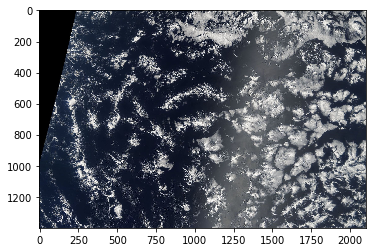

In [8]:
image_first = cv2.imread(join(utils.TRAIN_IMAGES, image_list[0]))
image_first = cv2.cvtColor(image_first, cv2.COLOR_BGR2RGB)
plt.imshow(image_first)
plt.show()

In [9]:
image_shape = image_first.shape
print("Image shape:", image_shape)

Image shape: (1400, 2100, 3)


### Segmentation samples

In [10]:
train_labels['Image_Label'] = train_labels['Image_Label'].apply(lambda x: x.split('_')[0])
train_labels

,Image_Label,EncodedPixels
0,0011165.jpg,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg,NaN
3,0011165.jpg,NaN
4,002be4f.jpg,233813 878 235213 878 236613 878 238010 881 23...
...,...,...
22179,ffd6680.jpg,NaN
22180,ffea4f4.jpg,NaN
22181,ffea4f4.jpg,1194860 675 1196260 675 1197660 675 1199060 67...
22182,ffea4f4.jpg,NaN


In [11]:
masks = utils.make_masks(train_labels, image_list[0], image_shape)
print(masks.shape)

(1400, 2100, 4)


In [12]:
train_labels

,Image_Label,EncodedPixels
0,0011165.jpg,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg,NaN
3,0011165.jpg,NaN
4,002be4f.jpg,233813 878 235213 878 236613 878 238010 881 23...
...,...,...
22179,ffd6680.jpg,NaN
22180,ffea4f4.jpg,NaN
22181,ffea4f4.jpg,1194860 675 1196260 675 1197660 675 1199060 67...
22182,ffea4f4.jpg,NaN


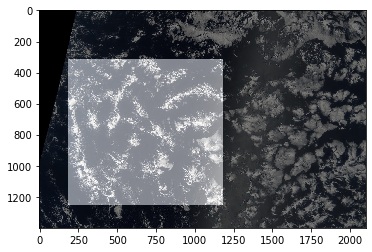

In [13]:
plt.imshow(image_first)
plt.imshow(masks[:,:,0], alpha=.5, cmap='gray')
plt.show()

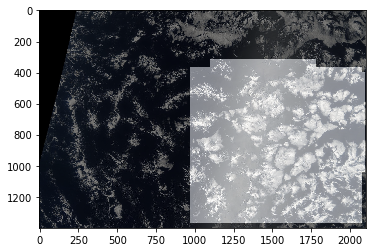

In [14]:
plt.imshow(image_first)
plt.imshow(masks[:,:,1], alpha=.5, cmap='gray')
plt.show()

In [40]:
sub = pd.read_csv("submission.csv")
sub

,Image_Label,EncodedPixels
0,da152e4.jpg_Fish,NaN
1,da152e4.jpg_Flower,NaN
2,da152e4.jpg_Gravel,58 2 69 1 97 1 122 2 125 2 137 3 141 6 265 7 2...
3,da152e4.jpg_Sugar,2299 3 2309 3 2313 1 2323 6 2649 5 2658 7 2671...
4,c96a28f.jpg_Fish,NaN
...,...,...
14787,b12acc9.jpg_Sugar,24445 5 24791 1 24795 6 25129 1 25141 14 25474...
14788,a7a97bb.jpg_Fish,NaN
14789,a7a97bb.jpg_Flower,70517 5 70866 9 70878 1 71217 7 71228 1 71565 ...
14790,a7a97bb.jpg_Gravel,NaN


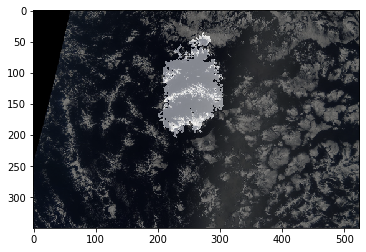

In [42]:
test_image = cv2.imread(join(utils.TEST_IMAGES, "a7a97bb.jpg"))
test_image = cv2.cvtColor(image_first, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(image_first, (525, 350))
plt.imshow(test_image)
plt.imshow(utils.rle2mask(sub['EncodedPixels'][14789], (350, 525)), cmap='gray', alpha=.5)
plt.show()

In [44]:
count  = 0
for r in sub['EncodedPixels']:
    if isinstance(r, str):
        count += 1

In [46]:
count -14792


-8352